In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

برای 5 تا تصویر اول اندازه ی 50*50 را برایشان انتخاب و بعد به خالت سیاه و سفید درشان میاورم. هر تصویر به صورت یک تنسور ذخیره شده . تصاویر اولیه را به ترتیب نشان دادم. در هر مرخله روی همین تصاویر انکودینگ انجام میشود
.
مقادیر اولیه ای هم که برای اندودینگ ها لازم است در همین بلاک کد به عنوان مقادیر سراسری در توابع استفاده کردم.
زمان و بازه های گزارش عملکرد و حد پایین و بالای مقادیر 

برای هر مدل که پارامتر دیگری نیاز داشته باشد در بخش کد مربوط به خودش تعریف کردم.
مثل تعداد نورون ها در نمایش مقدار عددی

Image 1 : 


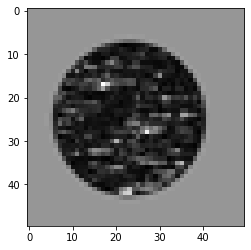

Image 2 : 


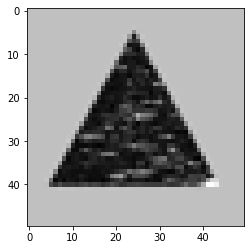

Image 3 : 


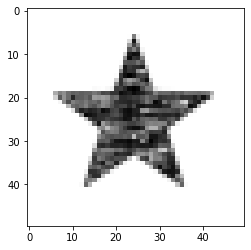

Image 4 : 


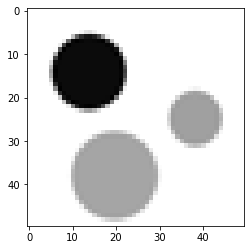

Image 5 : 


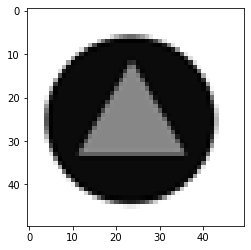

In [2]:
image_size = (50, 50)
images = [Image.open('image1.png'), Image.open('image2.png'), Image.open('image3.png'), Image.open('image4.png'), Image.open('image5.png')]
images_tensors = [torch.tensor(np.asarray(img.convert('RGB').convert('L').resize(image_size))) for img in images]

time = 1000
dt = 1
min_val = 0
max_val = 255

for i, img_tensor in enumerate(images_tensors):
    print(f'Image {i + 1} : ')
    plt.imshow(img_tensor, cmap='gray')
    plt.show()

In [3]:
def get_spiked_neurons(spikes):
    spiked_neurons = list(map(lambda x: x[0],filter(lambda x: x[1] == 1 ,enumerate(spikes))))
    return torch.tensor(spiked_neurons)

def raster_plot(population_spikes, dt):
    b = 0
    for spikes_per_step in population_spikes:
        for step, spikes in enumerate(spikes_per_step):
            spikes_flatten = torch.flatten(spikes)
            spiked_neurons = get_spiked_neurons(spikes_flatten)
            plot_neuron_index = list(map(lambda x: x + b, spiked_neurons))
            plt.scatter([dt*step]*len(spiked_neurons),plot_neuron_index,c='black',s=2)
    
        b += len(spikes_flatten)
    
    plt.xlabel('Time')
    plt.ylabel('Raster Activity')
    plt.show()

# Time to First Spike

در تمام نمودار ها یک زمان خاص وجود دارد که تغداد اسپایکها زیاد شده و روی نمودار به صورت یک خط درامده.
برای دو تصویر اول که شدت رنگی بیشتر دارند و پس زمینه شان تیره تر است این خط در زمان حلوتری اتفاق میوفتد و در تصاویری که پس زمینه روشن دارند خط در اوایل نمودار اتفاق افتاده.
حتی بین دو تصویر تیره هم انکه پس زمینه تیره تر دارد دیرتر این خط را روی نمودار نمایش می دهد.
این خط در این نوع کدگذاری نمایشگر فعالیت همزمان گروه زیادی از نورون هاست مه در واقع در پاسخ به محرک تصویری است که در پیکسلهای رنگی مشابه در کنارهم اتفاق افتاده اند.
نظیر هر هر گروه رنگی یکسان، یک گروه فعالیت نورونی در این گدگذاری دیده می‌شود که زمتن اتفاق افتادن ان بسته به شدت رنگی دارد که رخ داده.
در واقع روی نمودار به تعداد گروه های رنگی که از انها به اشکال و فضای منفی بین آنها تعبیر میکنیم، توده ی فعالیت نورونی وجود دارد.
روی تصویرهایی که شکل دایره دارند یک سری فعالیت مستطیل مانند هست که این الگوها روی فعالیت های تصویر مثلث به صورت پراکنده تری اتفاق افتاده اند.
در تصویر ستاره و تصویر آخر که از هر دوی این تصاویر در خود دارد به صورت مختلط این الگوها دیده می شود.
اگر نمودار کد را به حالت 5000 در 50 رسم کنیم با فرض این که هر نقطه به رنگ روی نمودار رسم شود، تصاویر اصلی را می توان دید
در این کدگذاری بعد از حدود زمان 500 دیگر فعالیتی رخ نداده که روی نمودار رسم شود.

In [4]:
def min_max_scaler(min_val, max_val, val):
    return (val - min_val) / (max_val - min_val)

def TimeToFirstSpikeEncoder(img, time, dt):
    shape = img.shape
    steps = int(time / dt)
    coded_img = torch.zeros(steps, *shape)
        
    img_scaled_flatten = [int(min_max_scaler(min_val, max_val, val) * steps) for val in img.flatten()]

    for i in range(steps):
        spikes = torch.tensor(list(map(lambda x: 1 if x == steps - i else 0, img_scaled_flatten))).view(shape)
        coded_img[i] = spikes

    return coded_img

Image 1 raster plot: 


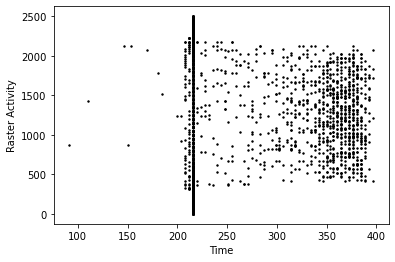

Image 2 raster plot: 


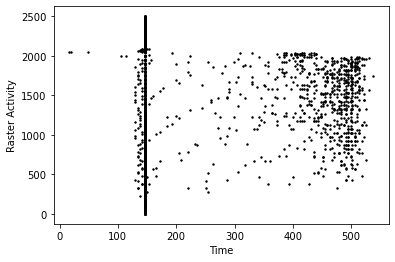

Image 3 raster plot: 


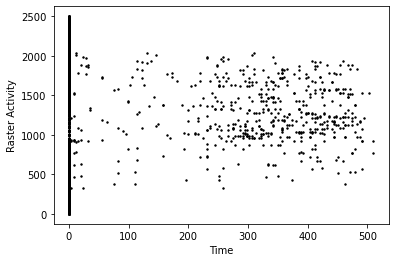

Image 4 raster plot: 


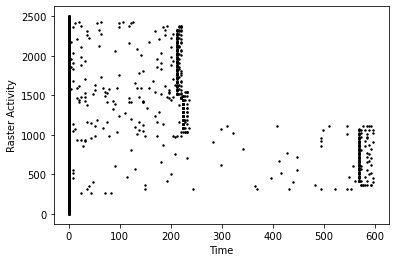

Image 5 raster plot: 


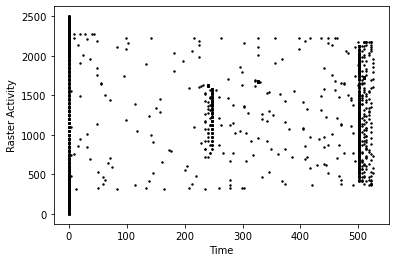

In [5]:
for i, img_tensor in enumerate(images_tensors):
    coded = TimeToFirstSpikeEncoder(img_tensor,time,dt)
    print(f'Image {i + 1} raster plot: ')
    #raster_plot(coded.T, dt)
    raster_plot([coded], dt)

# Represent Numbers 

در این نمایش 10 نورون گرفتم و روی بازه ی 0 تا 255 با فاصله های مساوی نمودارهای گاوسی قرار دادم.
برای نمایش هر تصویر این نمودارها را با 50*50 پیکسل که هر کدام عددی روی ان بازه دارند برخودرد می‌دهم. 
نقاط برخورد محل اسپایک هاست.
در این نمایش دوبعدی بودن تصویر را از دست دادم. تحلیل اینکه کدام بخش تصویر کدام الگو را در نمودار ایجاد کرده روی این نمودارها واضخ نیست.
اگر بخواهیم تصویر را بازسازی کنیم به ازای هر نورون روی این بازه ی زمانی میتوان حدودی از مقدار عددی پیکسل ها به دست آورد و تصویر را با رنگهای اصلی اولیه دوباره ساخت.
مقداری که نورون های نیمه ی اول نمایش می دهند نظیر رنگ های روشن تر است. در نمایش تصاویری که روشنایی بیشتر رنگها را داند فعالیت این نورون ها در زمان زودتری مشاهده شده (مثل عکس4)
تمام نورون ها در بالای نمودار روی عدد 1000 نمودار پیوسته دارند و این یعنی به ازای هر عدد که پیکسل داشته باشد، روی 1000 با تمام نورون ها برخورد خواهد داشت (اخرین اسپایک ها) و تراکم سمت راست نمودارها هم بابت همین مساله ست.

In [6]:
def gaussian_pdf(mu, sigma):
    return lambda x: (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp( - (x - mu) ** 2 / (2 * sigma ** 2) )

In [7]:
def raster_plot_number_representation(coded, neuron_number):
    for i in range(neuron_number):
        plt.scatter(coded.T[i].flatten(),[i+1 for j in coded.T[i].flatten()],s=1,c='black')
    plt.show()

In [8]:
def number_representation(img, time, neuron_number):
    neuron_distance = (max_val - min_val) / neuron_number
    shape = img.shape
    steps = int(time / dt)
    
    def make_gaussian_neuron(mu, sigma):
        f = gaussian_pdf(mu, sigma)
        return lambda x: (f(x) * -steps) / f(mu) + steps
        
    gaussian_neurons = [make_gaussian_neuron(i * neuron_distance, neuron_distance) for i in range(neuron_number)]

    return torch.tensor(list(map(lambda x: [f(x) for f in gaussian_neurons],img.flatten()))).view(*shape, neuron_number)

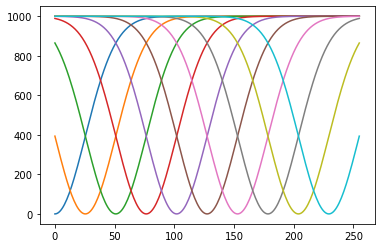

In [9]:
neuron_number = 10
neuron_distance = (max_val - min_val) / neuron_number
steps = int(time / dt)
    
def make_gaussian_neuron(mu, sigma):
    f = gaussian_pdf(mu, sigma)
    return lambda x: (f(x) * -steps) / f(mu) + steps
        
gaussian_neurons = [make_gaussian_neuron(i * neuron_distance, neuron_distance) for i in range(neuron_number)]

val = [i for i in range(0,256)]
for g in gaussian_neurons:
    plt.plot(val,[g(v) for v in val])
plt.show()

مقادیر بین 0 تا 255 را طبق این 10 منحنی گوسی وارونه نظیر می کنم. هر پیکسل رنگی روی هر خط عمودی که در این تصویر باشد به تعدادی از این منحنیها برخورد خواهد کرد. عرض نقاط برخورد، نمایش عدد مورد نظر است.

Image 1 raster plot: 


<ipython-input-7-a3ef9a6dda62>:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2318.)
  plt.scatter(coded.T[i].flatten(),[i+1 for j in coded.T[i].flatten()],s=1,c='black')


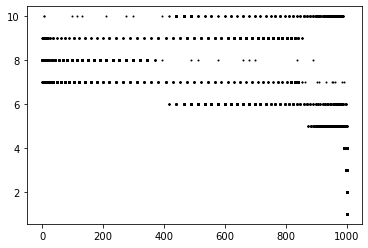

Image 2 raster plot: 


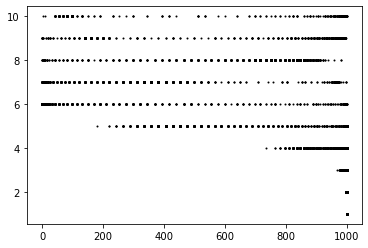

Image 3 raster plot: 


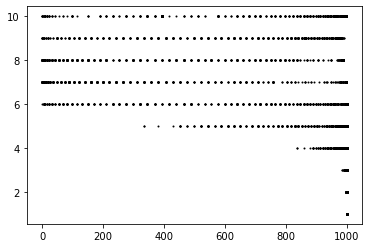

Image 4 raster plot: 


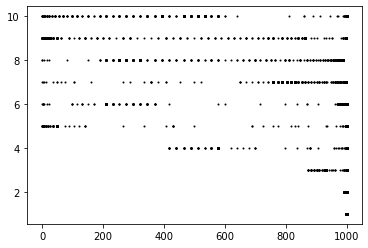

Image 5 raster plot: 


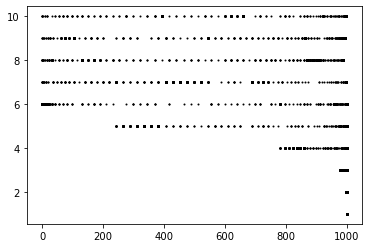

In [10]:
for i, img_tensor in enumerate(images_tensors):
    coded = number_representation(img_tensor, time, neuron_number)
    print(f'Image {i + 1} raster plot: ')
    raster_plot_number_representation(coded, neuron_number)

# Poisson Encoder

ترکیبی از مزایای دو تابع قبلی که هم حالت شکلی دوبعدی را حفظ کرده و هم شدت رنگها را کد می‌کند.
در نمودارها شلوغی بیشتری داریم و چشم ناظر در این حالت الگوهای اسپایک ها را پیدا نمی کند.
اما اگر روی هر نمودار دقت کنیم الگوی اسپایک هایی می توان دید که با بقیه تفاوت دارد و در عین حال مثلا تصویر 1 و 5 که هر دو شمایل کلی دایره را دارند شباهت الگو را می توان تشخیص داد.
 درست مثل روش زمان اولین اسپایک اگر نمودار را به صورت 50000*50 رسم کنم شمایل کلی تصویر اولیه را واضخ تر می توان دید.
 برای نمونه برای تصویر آخر این نمودار ترسیم شده.

In [11]:
def poisson_encoder(img, max_spikes, time, dt):
    steps = int(time/dt)
    shape = img.shape
    coded_img = torch.zeros(steps, *shape)
    img_flatten = img.flatten()

    for i in range(steps):
        spikes = torch.tensor(
            list(map(lambda x: 1 if np.random.rand()<(max_spikes/steps)*(x/max_val) else 0,img_flatten))).view(shape)

        coded_img[i] = spikes
        
    return coded_img

Image 1 raster plot: 


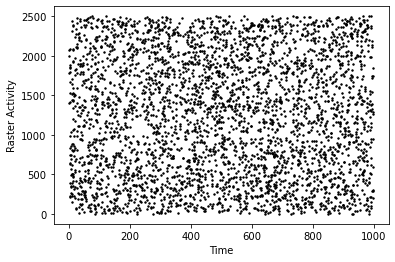

Image 2 raster plot: 


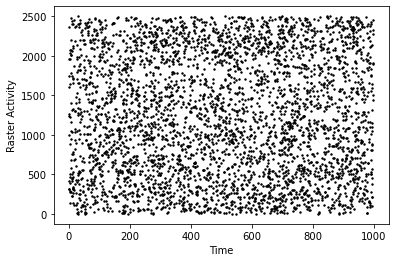

Image 3 raster plot: 


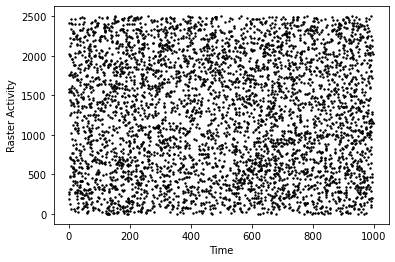

Image 4 raster plot: 


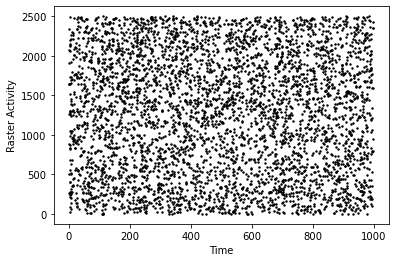

Image 5 raster plot: 


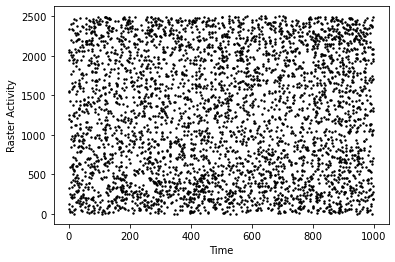

In [12]:
max_spikes = 2

for i, img_tensor in enumerate(images_tensors):
    coded = poisson_encoder(img_tensor, max_spikes, time, dt)
    print(f'Image {i + 1} raster plot: ')
    #raster_plot(coded.T, dt)
    raster_plot([coded], dt)

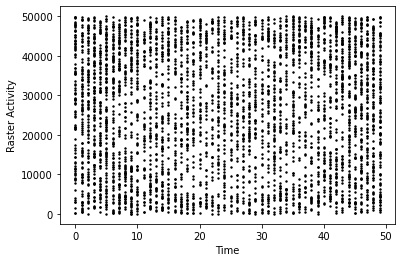

In [13]:
raster_plot(coded.T, dt)

نمایش تصویر اخر که 90 درجه به راست چرخیده (برای اجرای سریع تر  رسم نمودار)